# Foto 1 
Esta es la actividad con la foto 1 de la actividad de la clase de Herramientas computacionales

In [4]:
#importar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt

El tamaño de la imagen es:  (3024, 4032, 3)


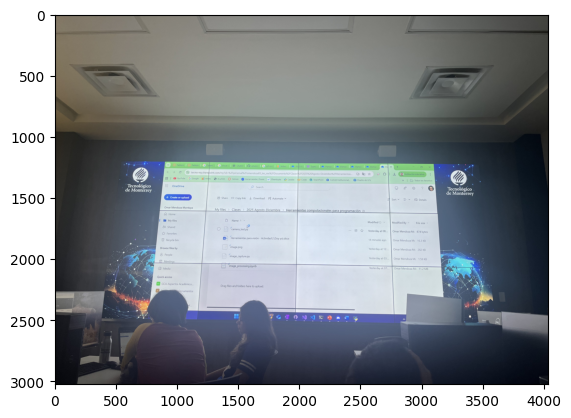

In [5]:
bgr = cv2.imread('foto1.jpg')
print("El tamaño de la imagen es: ", bgr.shape)

#Convertir a RGB
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

#Mostrar la imagen
plt.imshow(rgb)

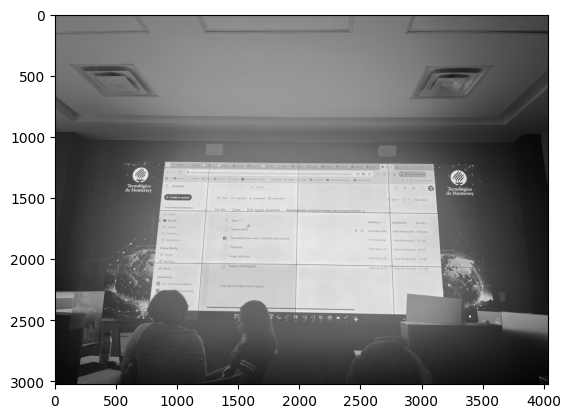

In [3]:
#Mostrar la imagen en escala de grises y HSV
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')



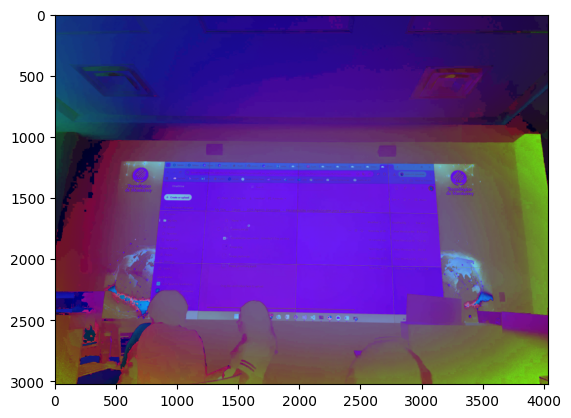

In [4]:
#Mostrar la imagen en HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

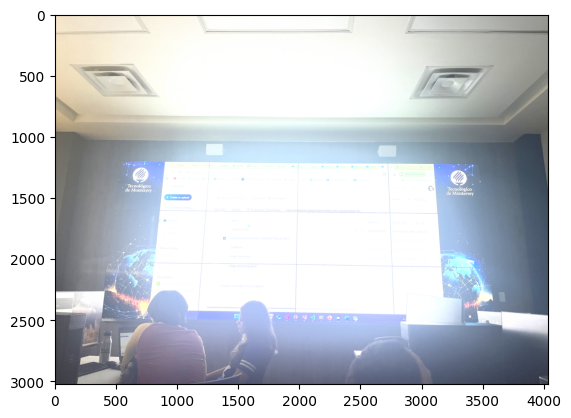

In [5]:
#Ajuste de brillo y contraste
alpha = 1.5 # Contraste
beta = 50   # Brillo
adjusted = cv2.convertScaleAbs(bgr, alpha=alpha, beta=beta)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

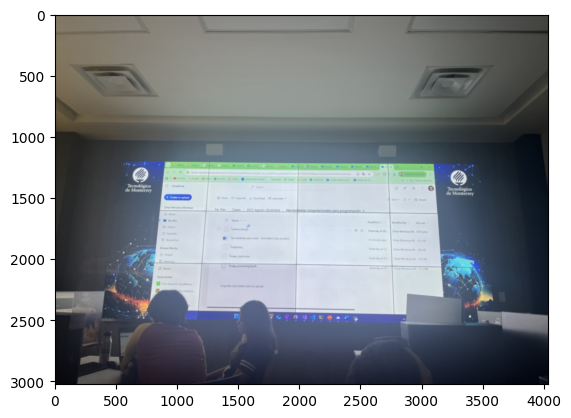

In [6]:

#Filtro de desenfoque gaussiano
blurred = cv2.GaussianBlur(bgr, (15, 15),
                            sigmaX=0, sigmaY=0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))



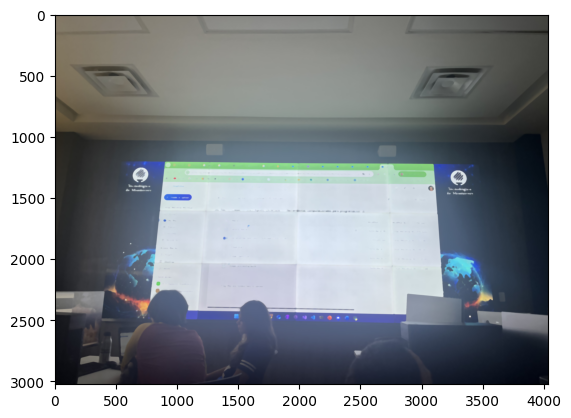

In [7]:
#Filtro de desenfoque medio
median = cv2.medianBlur(bgr, 15)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))


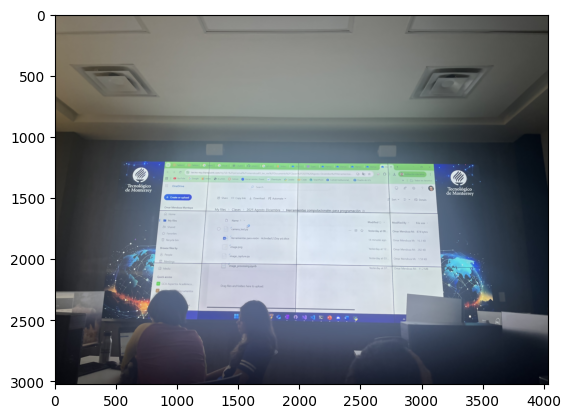

In [8]:
#Filtro de desenfoque bilateral
bilateral = cv2.bilateralFilter(bgr, d=15,
                                sigmaColor=75,
                                sigmaSpace=75)
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))

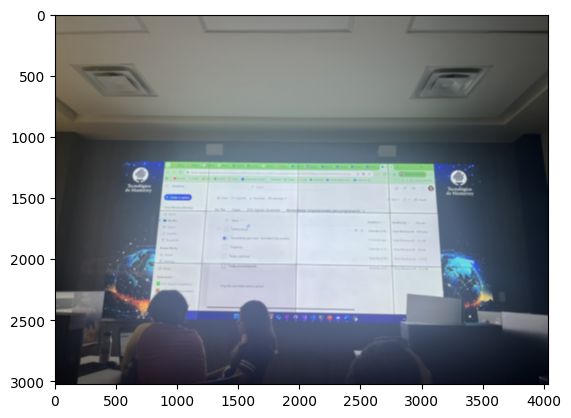

In [9]:
#Filtro de desenfoque promedio
blur = cv2.blur(bgr, (15, 15))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))


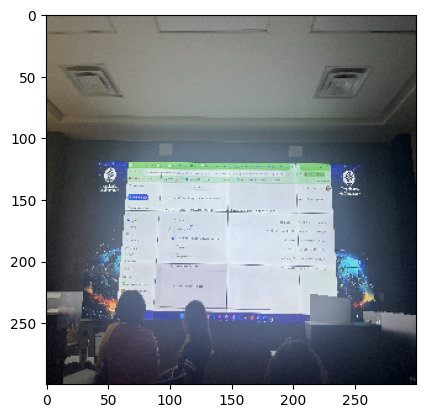

In [10]:
#Transformaciones geométricas
#Redimensionar
resized = cv2.resize(bgr, (300, 300))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

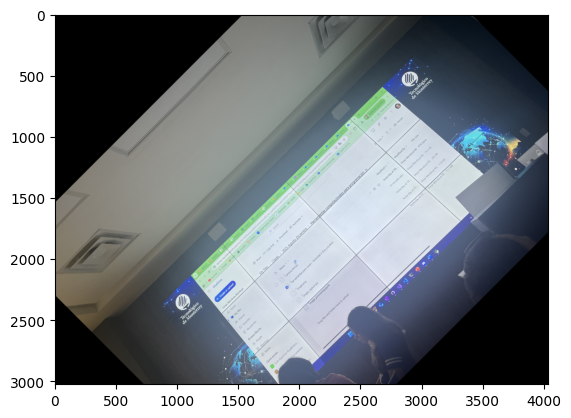

In [11]:
#Rotar y trasladar
(h, w) = bgr.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
M[0, 2] += 100  # Trasladar en x
M[1, 2] += 50   # Trasladar en y
plt.imshow(cv2.cvtColor(cv2.warpAffine(bgr, M, (w, h)), cv2.COLOR_BGR2RGB))


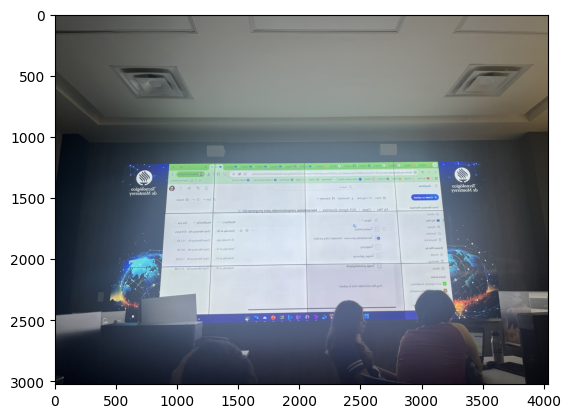

In [12]:
#Voltear horizontal y verticalmente
flipped_h = cv2.flip(bgr, 1)
plt.imshow(cv2.cvtColor(flipped_h, cv2.COLOR_BGR2RGB))



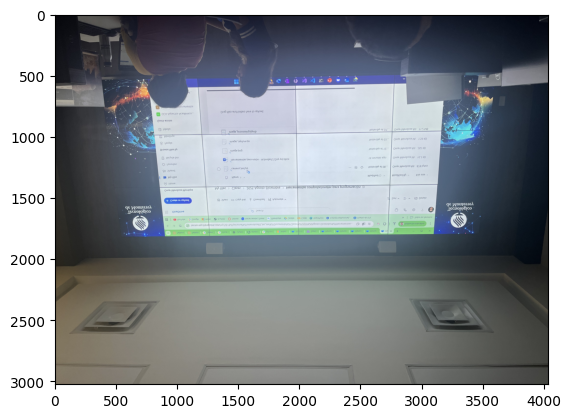

In [13]:
flipped_v = cv2.flip(bgr, 0)
plt.imshow(cv2.cvtColor(flipped_v, cv2.COLOR_BGR2RGB))


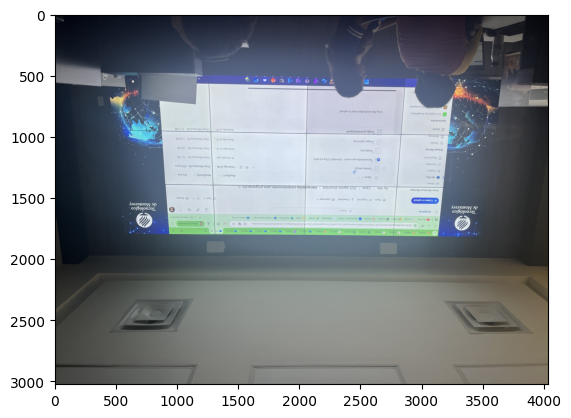

In [14]:
flipped_hv = cv2.flip(bgr, -1)
plt.imshow(cv2.cvtColor(flipped_hv, cv2.COLOR_BGR2RGB))

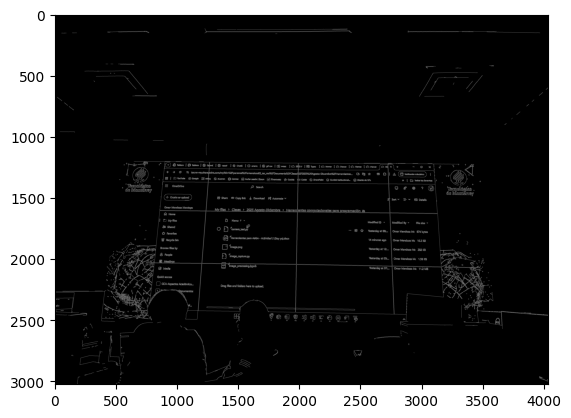

In [15]:
#Detectar bordes con Canny
edges = cv2.Canny(bgr, 100, 200)
plt.imshow(edges, cmap='gray')


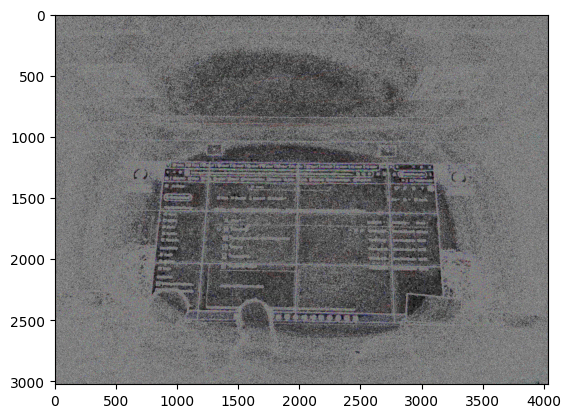

In [16]:
#Detectar bordes con Sobel
sobelx = cv2.Sobel(bgr, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(bgr, cv2.CV_64F, 0, 1, ksize=5)      
plt.imshow(cv2.cvtColor(cv2.magnitude(sobelx, sobely).astype(np.uint8), cv2.COLOR_BGR2RGB))

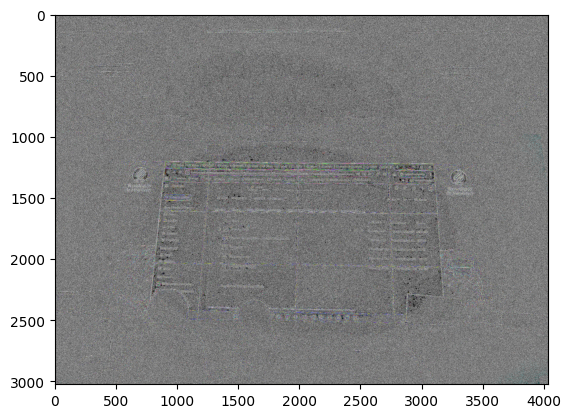

In [17]:
#Detectar bordes con Laplacian
laplacian = cv2.Laplacian(bgr, cv2.CV_64F)
plt.imshow(cv2.cvtColor(laplacian.astype(np.uint8), cv2.COLOR_BGR2RGB))

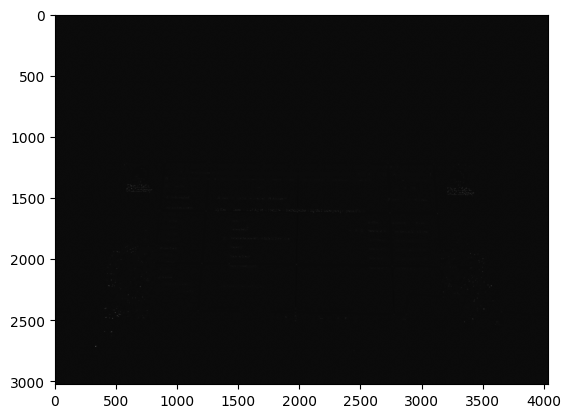

In [18]:
#Detectar esquinas con Harris
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)         
plt.imshow(dst, cmap='gray')

In [ ]:
#Deteccion de circulos con Hough
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1,
                           minDist=20, param1=50,
                           param2=30, minRadius=0,
                           maxRadius=0)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(bgr, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(bgr, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))                                                                              

        

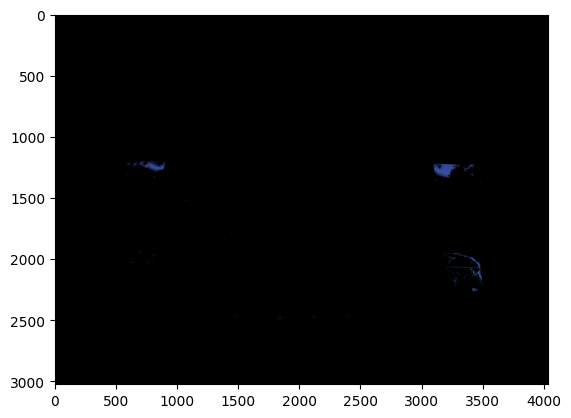

In [17]:
#Segmentar objetos por color HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
lower_color = np.array([30, 150, 50])
upper_color = np.array([255, 255, 180])
mask = cv2.inRange(hsv, lower_color, upper_color)
result = cv2.bitwise_and(bgr, bgr, mask=mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  



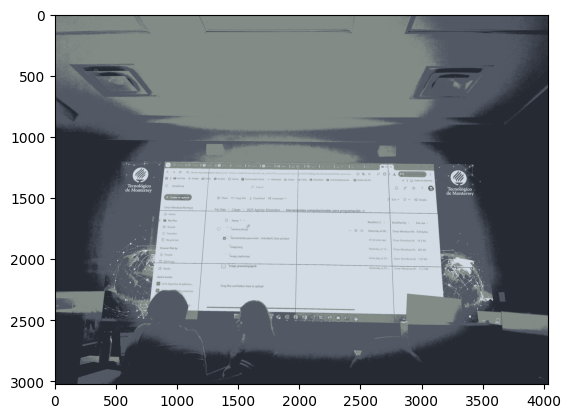

In [6]:
#Segmentar por k-means
Z = bgr.reshape((-1, 3))
Z = np.float32(Z)       
# --- IGNORE ---
K = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# --- IGNORE ---
centers = np.uint8(centers)
segmented = centers[labels.flatten()]
segmented = segmented.reshape(bgr.shape)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))    